# TEXTBLOB

In [3]:
import pandas as pd

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from textblob import TextBlob
from nltk import tokenize
from matplotlib import pyplot as plt

In [5]:
use_cols = ['CleanedTweet', 'state','date','start date','end date', 'replyCount','retweetCount','likeCount']
df = pd.read_csv('Datasets/cleaned_vaccine_tweets.csv', usecols = use_cols)
df.head()

/Users/victoriaadcock/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,date,CleanedTweet,replyCount,retweetCount,likeCount,state,start date,end date
0,2020-03-31 22:25:13+00:00,looks like study ga device vaccine treatment l...,0.0,0,1,Alabama,01/03/2020,01/04/2020
1,2020-03-31 16:54:46+00:00,uga team say vaccine coronavirus,6.0,2,32,Alabama,01/03/2020,01/04/2020
2,2020-03-31 10:55:38+00:00,draw line wa riding followers vote jess vote a...,0.0,1,5,Alabama,01/03/2020,01/04/2020
3,2020-03-31 05:08:05+00:00,make carona vaccine make mandatory child get d...,0.0,1,2,Alabama,01/03/2020,01/04/2020
4,2020-03-30 23:51:48+00:00,exciting news second vaccine trial site,0.0,2,5,Alabama,01/03/2020,01/04/2020


In [6]:
df['CleanedTweet'] = df['CleanedTweet'].astype('str')

In [7]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

df['Polarity'] = df['CleanedTweet'].apply(get_polarity)

In [8]:
df['Textblob_Sentiment_Type']=''
df.loc[df.Polarity>0,'Textblob_Sentiment_Type']='1'
df.loc[df.Polarity==0,'Textblob_Sentiment_Type']='0'
df.loc[df.Polarity<0,'Textblob_Sentiment_Type']='-1'

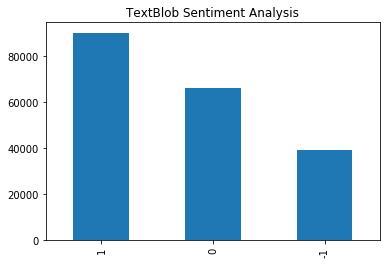

In [9]:
df.Textblob_Sentiment_Type.value_counts().plot(kind='bar',title="TextBlob Sentiment Analysis")

# VADER

In [10]:
import nltk
#nltk.download('vader_lexicon')

In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [12]:
df['scores'] = df['CleanedTweet'].apply(lambda tweet: sid.polarity_scores(tweet))

df.head()

,date,CleanedTweet,replyCount,retweetCount,likeCount,state,start date,end date,Polarity,Textblob_Sentiment_Type,scores
0,2020-03-31 22:25:13+00:00,looks like study ga device vaccine treatment l...,0.0,0,1,Alabama,01/03/2020,01/04/2020,0.45,1,"{'neg': 0.0, 'neu': 0.62, 'pos': 0.38, 'compou..."
1,2020-03-31 16:54:46+00:00,uga team say vaccine coronavirus,6.0,2,32,Alabama,01/03/2020,01/04/2020,0.00,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,2020-03-31 10:55:38+00:00,draw line wa riding followers vote jess vote a...,0.0,1,5,Alabama,01/03/2020,01/04/2020,0.00,0,"{'neg': 0.0, 'neu': 0.814, 'pos': 0.186, 'comp..."
3,2020-03-31 05:08:05+00:00,make carona vaccine make mandatory child get d...,0.0,1,2,Alabama,01/03/2020,01/04/2020,0.00,0,"{'neg': 0.14, 'neu': 0.645, 'pos': 0.215, 'com..."
4,2020-03-30 23:51:48+00:00,exciting news second vaccine trial site,0.0,2,5,Alabama,01/03/2020,01/04/2020,0.15,1,"{'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compou..."


In [35]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df.head()

,CleanedTweet,Polarity,Textblob_Sentiment_Type,scores,compound,vader_sentiment_type
0,looks like study ga device vaccine treatment l...,0.45,1,"{'neg': 0.0, 'neu': 0.62, 'pos': 0.38, 'compou...",0.8481,
1,uga team say vaccine coronavirus,0.00,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,
2,draw line wa riding followers vote jess vote a...,0.00,0,"{'neg': 0.0, 'neu': 0.814, 'pos': 0.186, 'comp...",0.4939,
3,make carona vaccine make mandatory child get d...,0.00,0,"{'neg': 0.14, 'neu': 0.645, 'pos': 0.215, 'com...",0.1027,
4,exciting news second vaccine trial site,0.15,1,"{'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compou...",0.4939,


In [43]:
df['vader_sentiment_type'] = df['compound'].apply(lambda c: '1' if c > 0 else '0' if c == 0 else '-1')

df.head()

,CleanedTweet,Polarity,Textblob_Sentiment_Type,scores,compound,vader_sentiment_type
0,looks like study ga device vaccine treatment l...,0.45,1,"{'neg': 0.0, 'neu': 0.62, 'pos': 0.38, 'compou...",0.8481,1
1,uga team say vaccine coronavirus,0.00,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0
2,draw line wa riding followers vote jess vote a...,0.00,0,"{'neg': 0.0, 'neu': 0.814, 'pos': 0.186, 'comp...",0.4939,1
3,make carona vaccine make mandatory child get d...,0.00,0,"{'neg': 0.14, 'neu': 0.645, 'pos': 0.215, 'com...",0.1027,1
4,exciting news second vaccine trial site,0.15,1,"{'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compou...",0.4939,1


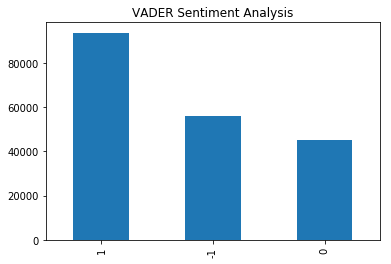

In [44]:
df.vader_sentiment_type.value_counts().plot(kind='bar',title="VADER Sentiment Analysis")

In [45]:
df.to_csv('Datasets/textblob_vader_classified.csv',index=False)